In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

In [3]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [20]:
rfc.score(X_test, y_test)

0.9853658536585366

In [21]:
gnb.score(X_test, y_test)

0.8146341463414634

In [22]:
gbc.score(X_test, y_test)

0.9609756097560975

In [23]:
knn.score(X_test_scaled, y_test)

0.8463414634146341

In [24]:
lg.score(X_test_scaled, y_test)

0.8073170731707318

In [25]:
svc.score(X_test_scaled, y_test)

0.9243902439024391

In [31]:
from sklearn.metrics import recall_score

y_preds = rfc.predict(X_test)
print("Random Forest Recall:", recall_score(y_test, y_preds))

gnb_preds = gnb.predict(X_test)
print("Gaussian NB Recall:", recall_score(y_test, gnb_preds))

gbc_preds = gbc.predict(X_test)
print("Gradient Boosting Recall:", recall_score(y_test, gbc_preds))

knn_preds = knn.predict(X_test_scaled)
print("KNN Recall:", recall_score(y_test, knn_preds))

lg_preds = lg.predict(X_test_scaled)
print("Logistic Regression Recall:", recall_score(y_test, lg_preds))

svc_preds = svc.predict(X_test_scaled)
print("SVC Recall:", recall_score(y_test, svc_preds))

Random Forest Recall: 0.9711538461538461
Gaussian NB Recall: 0.8605769230769231
Gradient Boosting Recall: 0.9663461538461539
KNN Recall: 0.8701923076923077
Logistic Regression Recall: 0.8365384615384616
SVC Recall: 0.9423076923076923


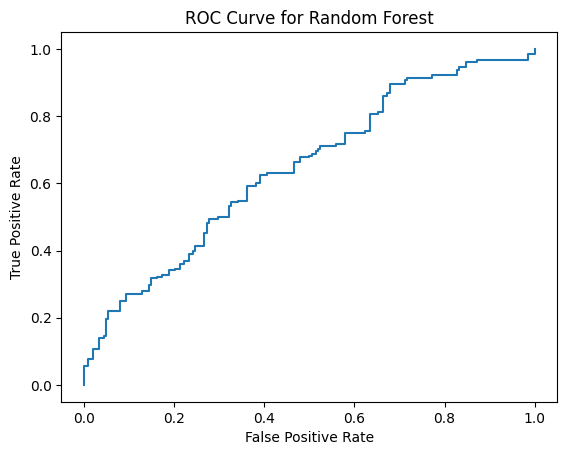

In [39]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lg.predict_proba(X_test.values)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [37]:
roc_auc_score(y_test, y_probs)

np.float64(1.0)

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features": [None, 'sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [44]:
best_rfc = grid_search.best_estimator_

In [45]:
best_rfc

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

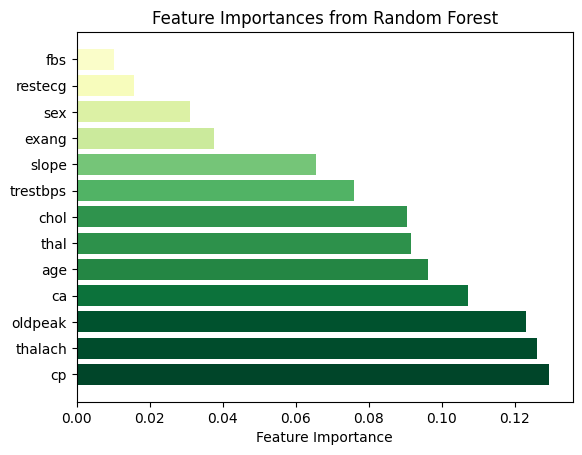

In [51]:
import numpy as np

feature_importances = best_rfc.feature_importances_
features = best_rfc.feature_names_in_ 

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

<Axes: >

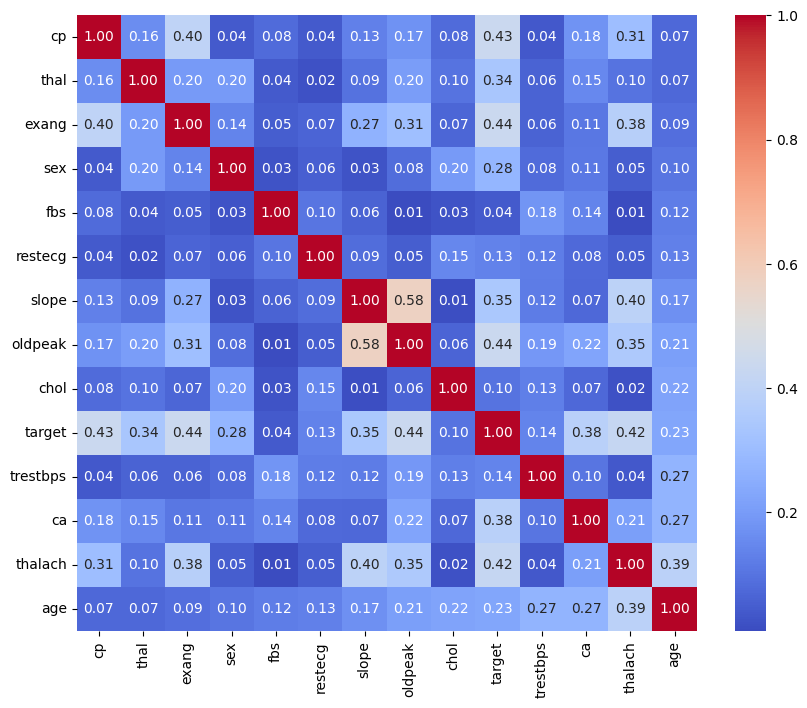

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.corr()).sort_values(by=df.corr().columns.tolist(), axis=0).sort_values(by=df.corr().columns.tolist(), axis=1), annot=True, fmt='.2f', cmap='coolwarm')